#  Business Case: Yulu - Hypothesis Testing

## About Yulu:

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


# Business Problem:

•	Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

•	How well those variables describe the electric cycle demands


# Problem Statement:

* Relation between the dependent and independent variable
   * Bivariate:
       * Dependance of count on weathe
       * Dependance of count on season
       * Depandance of count on windspeed
       * Depandance of count in days
       * Depandance of count in month
       * Depandance of count in year
       * Count of users in each humidity level
   * Multivariate
       * Season : Count : Year
       * Season : casual : Year
       * Season : registered : Year
       * Season : temp : month
       * Season : count : month
       * Season : windspeed : month
       * workingday : count : weather
       * Season : humidity : workingday
       * Season:Humidity: Month
       * Season : registered : Year
* Chisquare:
    * Weather is dependent on the season :Chisquare
    * workingday is dependent on the season
* Anova :
    * No. of cycles rented is similar or different in different season
    * No. of cycles rented is similar or different in different weather

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [3]:
data=pd.read_csv('bike_sharing.csv')
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Data Exploration

In [4]:
data.shape

(10886, 12)

In [5]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Data Informations

In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Convert object to date time

In [9]:
data['datetime']=pd.to_datetime(data['datetime'])

In [10]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# Data Visualisation

<AxesSubplot:>

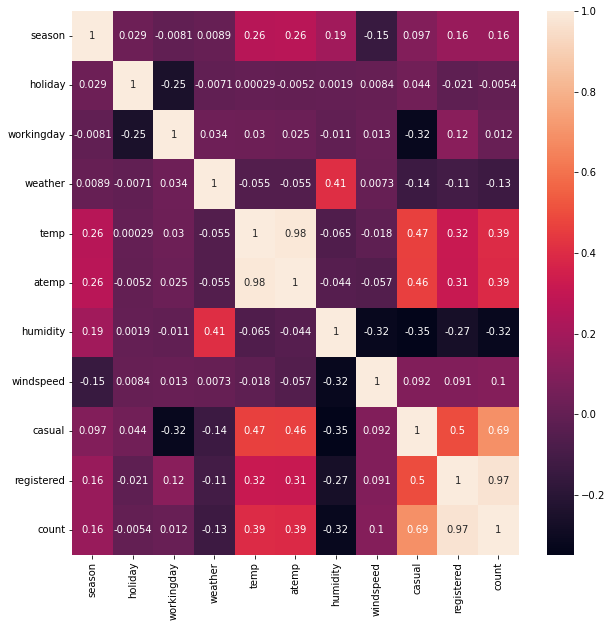

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

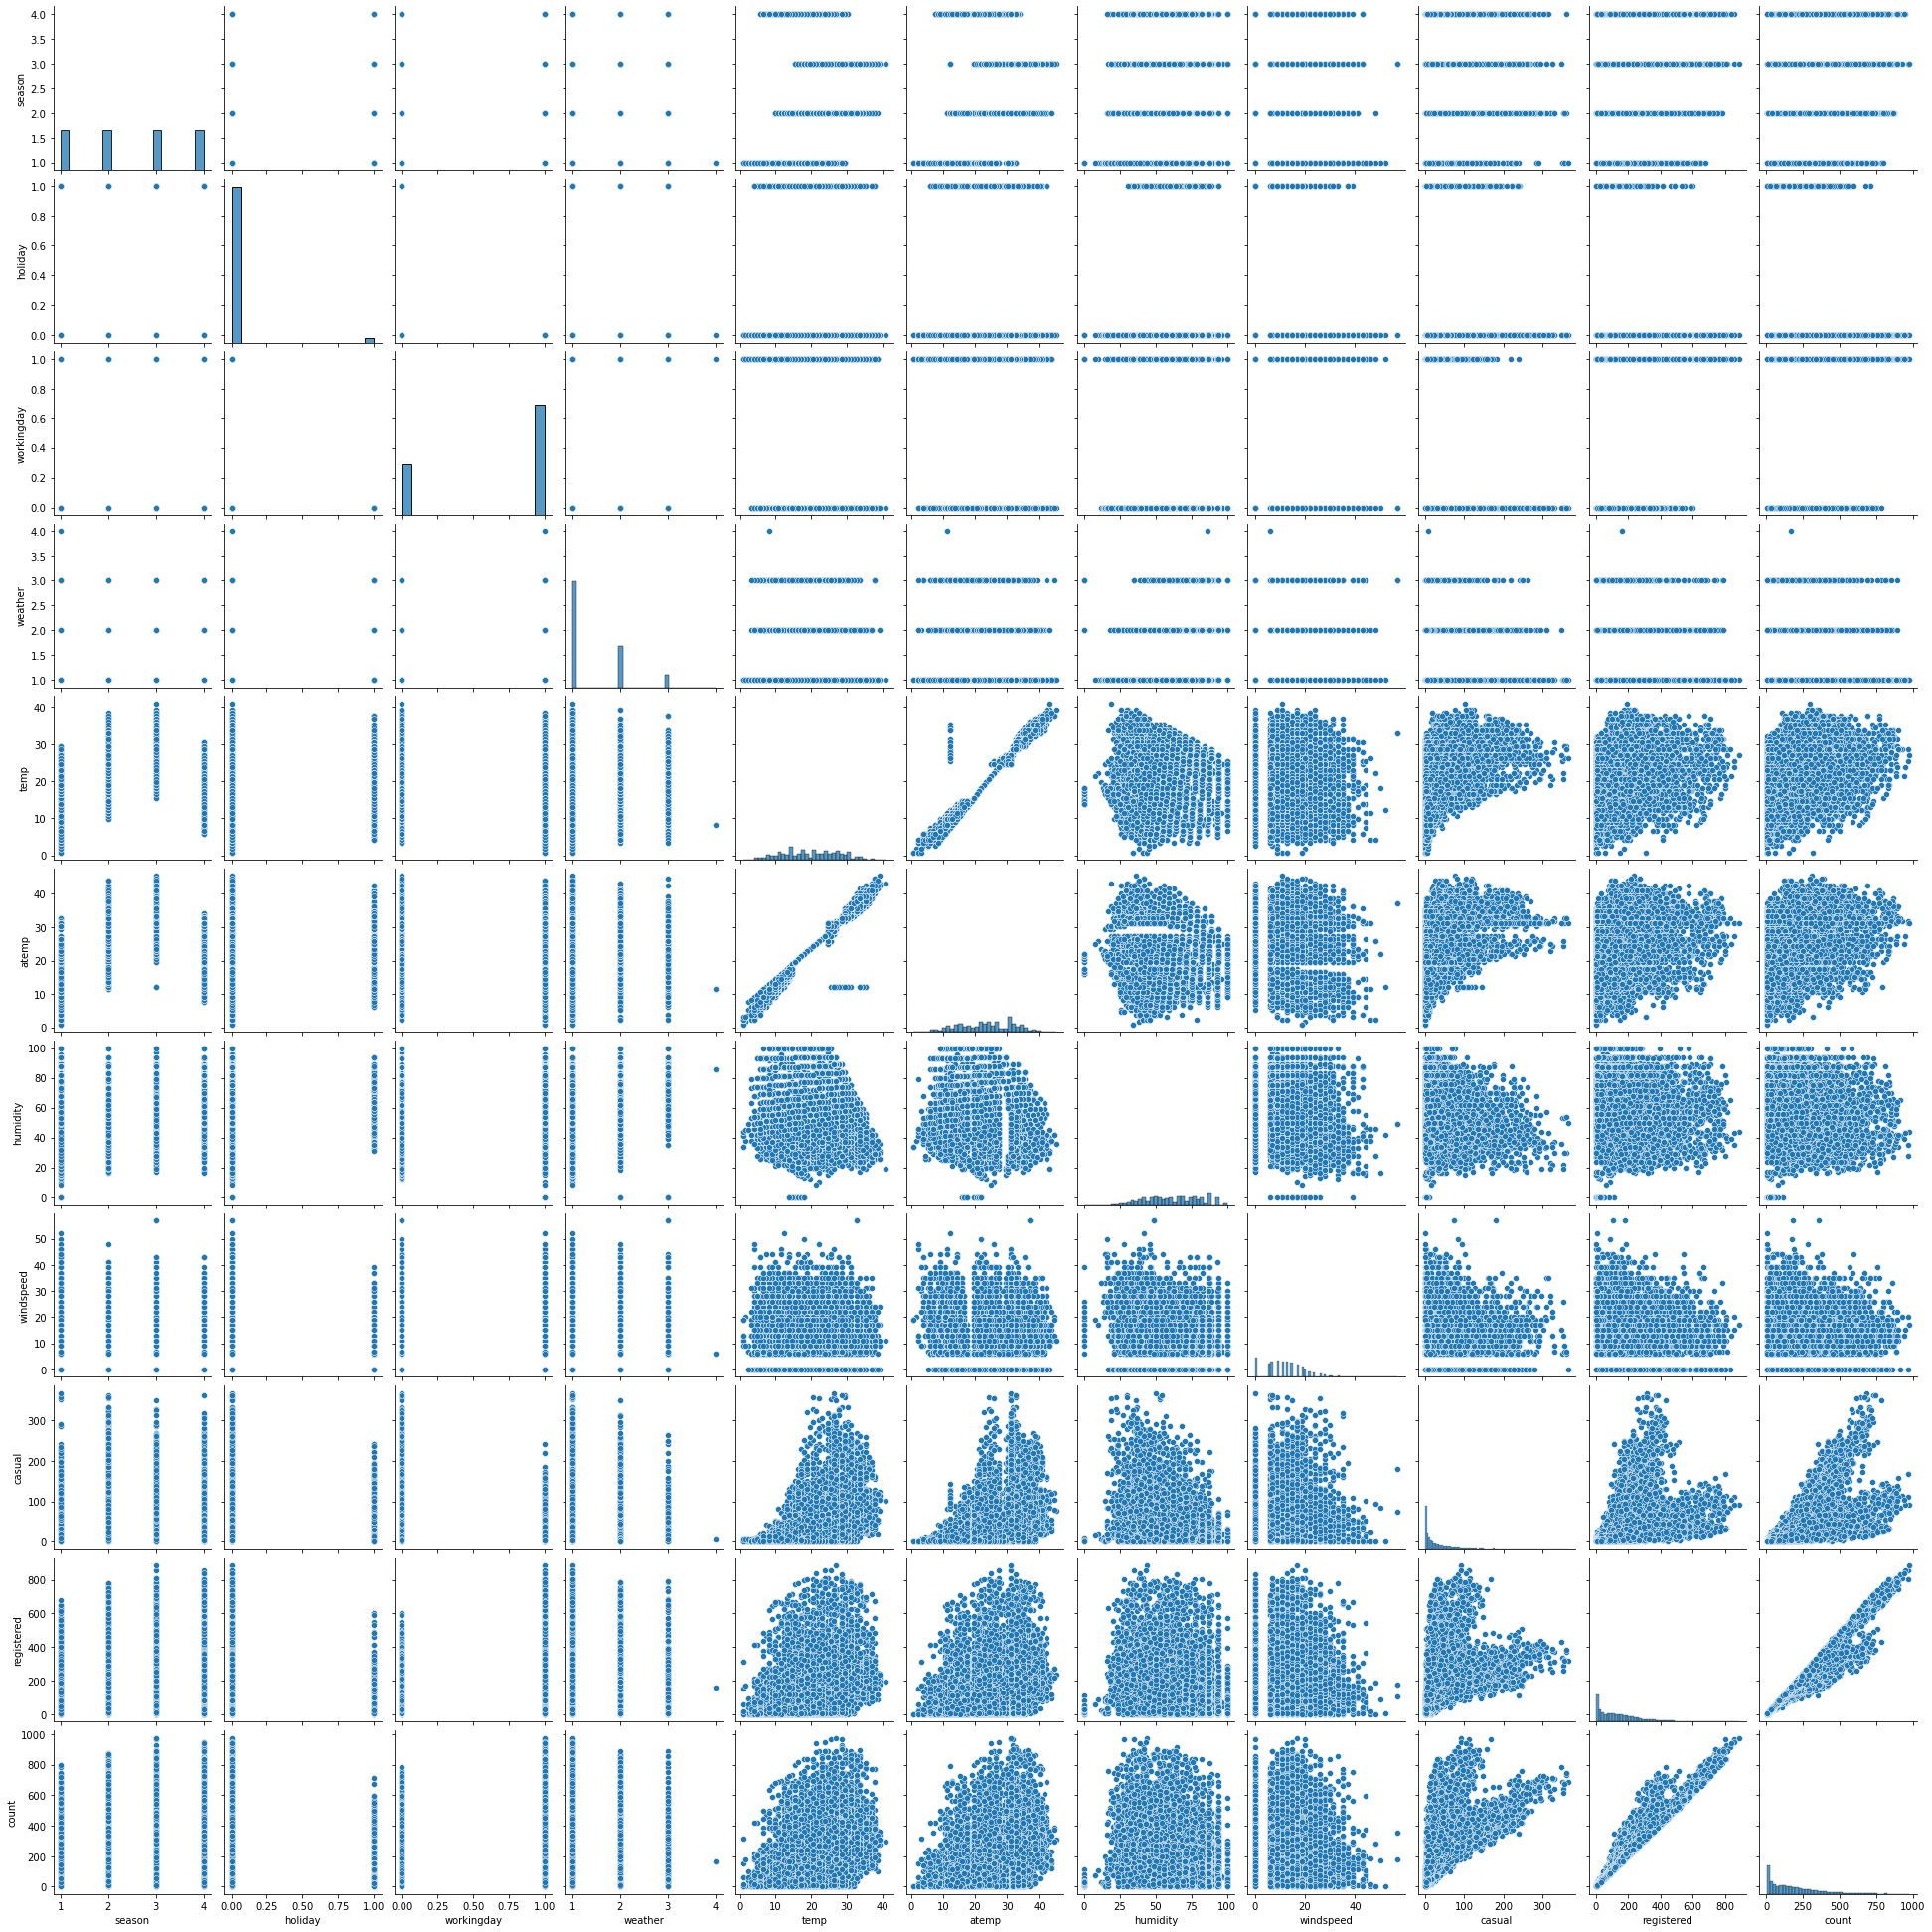

In [13]:
sns.pairplot(data)

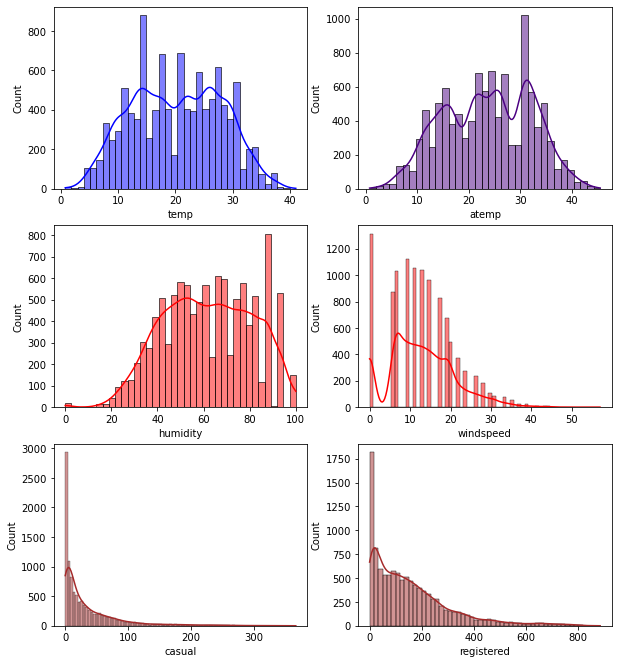

In [14]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=data, x="temp", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=data, x="atemp", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=data, x="humidity", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=data, x="windspeed", kde=True,color="red", ax=axis[1,1])
sns.histplot(data=data, x="casual", kde=True,color="brown", ax=axis[2,0])
sns.histplot(data=data, x="registered", kde=True,color="brown", ax=axis[2,1])
plt.show()

* From the above observations we can say that :-
    * Most of the values in temprature lies in range of 10 - 40.
    * Most of the values in atemp lies in range of 5 - 35.
    * Most of the values in humidity percentage lies in 30 -100
    * Most of the values in windspeed lies in range of 5 - 30.
    * Most of the values in casual users lies in 0 - 100
    * Most of the values in registered users lies in range of 0 - 400.

In [15]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## No of unique columns:

In [16]:
for col in data.columns:
    print(col,':',data[col].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


# Relation between the dependent and independent variable 

## Dependance of  weather on count

### Bivariate

In [17]:
x=data.groupby('weather')['count'].sum().sort_values(ascending=False).to_frame().reset_index()


In [18]:
y=data.groupby('weather')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
y

,weather,count
0,1,205.236791
1,2,178.955540
2,4,164.000000
3,3,118.846333


Text(0.5, 1.0, 'mean of users')

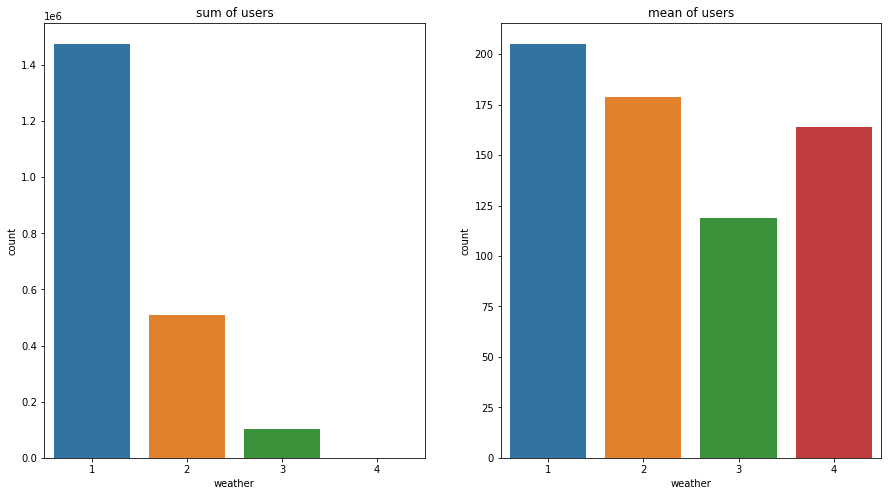

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x='weather',y='count',data=x)
plt.title('sum of users')

plt.subplot(1,2,2)
sns.barplot(x='weather',y='count',data=y)
plt.title('mean of users')


* From the diagram of mean of users, weather 1 have more count of total rental   bikes
* In the order of weather using more rental bike
     * wearther 1
     * wearther 2
     * wearther 4
     * wearther 3

## Dependance of count on season

In [20]:
z=data.groupby('season')['count'].sum().sort_values(ascending=False).to_frame().reset_index()
z

,season,count
0,3,640662
1,2,588282
2,4,544034
3,1,312498


In [21]:
w=data.groupby('season')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
w

,season,count
0,3,234.417124
1,2,215.251372
2,4,198.988296
3,1,116.343261


Text(0.5, 1.0, 'sum of users')

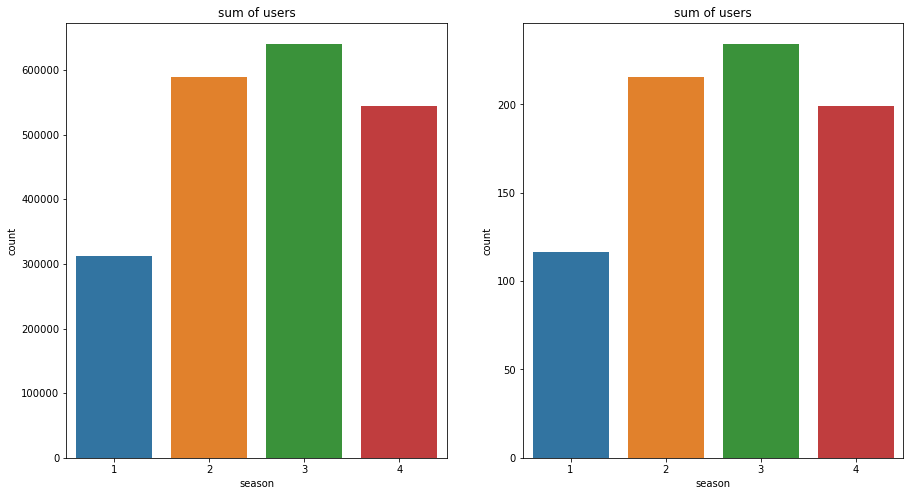

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x='season',y='count',data=z)
plt.title('sum of users')

plt.subplot(1,2,2)
sns.barplot(x='season',y='count',data=w)
plt.title('sum of users')


* From the diagram of mean of users ,in season 3 have more count of total rental   bikes

 * 1: Clear, Few clouds, partly cloudy, partly cloudy
 
 * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 
 * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +        Scattered clouds
 
 * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* In the order of season using more rental bike
     * season 3
     * season 2
     * season 4
     * season 1

## Depandance of count on 	windspeed

In [23]:
p=data.groupby('windspeed')['count'].sum().sort_values(ascending=False).to_frame().reset_index()
p

,windspeed,count
0,11.0014,213791
1,0.0000,211526
2,12.9980,210744
3,15.0013,202611
4,8.9981,196723
5,16.9979,177034
6,7.0015,175627
7,19.0012,147403
8,6.0032,128938
9,19.9995,110816


In [24]:
s=data.groupby('windspeed')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
s

,windspeed,count
0,56.9969,269.500000
1,35.0008,230.155172
2,26.0027,228.744681
3,19.9995,225.235772
4,23.9994,220.010949
5,27.9993,219.363636
6,19.0012,218.051775
7,30.0026,217.171171
8,16.9979,214.847087
9,15.0013,210.833507


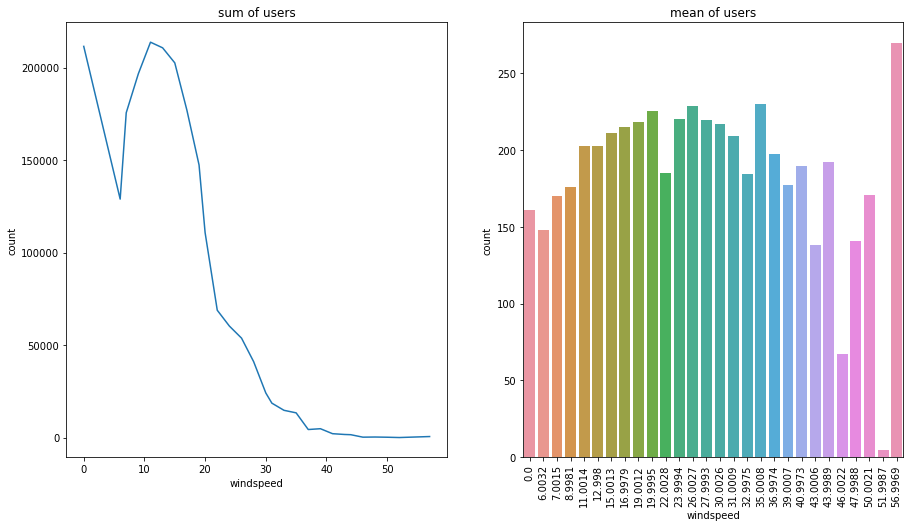

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.lineplot(x='windspeed',y='count',data=p)
plt.title('sum of users')

plt.subplot(1,2,2)
sns.barplot(x='windspeed',y='count',data=s)
plt.title('mean of users')
plt.xticks(rotation=90)
plt.show()

* From the above plot we can see that at higher windspeed no.of users are very low
* Most of the users are using  in the windspeed range of 0 to 25
* Mean count of the users are in the windspeed range of 0 to 40
* There is a uniform distribution of user count across all windspeed

## Depandance of count in days

In [46]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [47]:
data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [48]:
data['day']=data['datetime'].dt.day_name()
data['day'].value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: day, dtype: int64

In [51]:
g=data.groupby('day')['count'].mean().to_frame().reset_index()
g

,day,count
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


[]

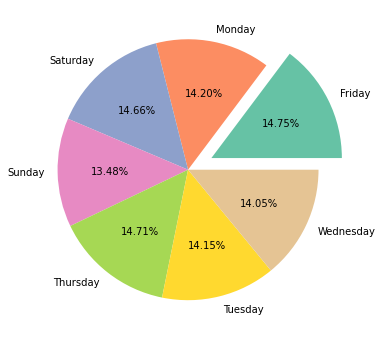

In [57]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=g, x=g['count'], colors=palette_color, labels=g['day'], explode=(0.2,0,0,0,0,0,0), autopct='%0.2f%%')
plt.plot()

* We can see that almost every day no.of users are same
* Most and leat mean users are in respective days are friday and sunday

## Depandance of count in month

In [31]:
data['month']=data['datetime'].dt.month_name()
data['year']=data['datetime'].dt.year
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday,January,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday,January,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday,January,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday,January,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,December,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,December,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,December,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,December,2012


In [32]:
g=data.groupby('month')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
g

,month,count
0,June,242.031798
1,July,235.325658
2,August,234.118421
3,September,233.805281
4,October,227.699232
5,May,219.459430
6,November,193.677278
7,April,184.160616
8,December,175.614035
9,March,148.169811


[]

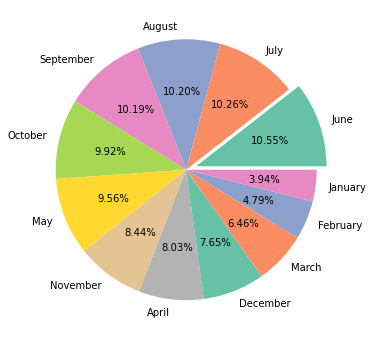

In [33]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=g, x=g['count'], colors=palette_color, labels=g['month'], explode=(0.08,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.2f%%')
plt.plot()

* june,july and august month are the most bike using months
   * june :10.55%
   * july : 10.26%
   * august : 10.20%
* Januery february are the least
    * Januery :3.94
    * february:4.79


## Depandance of count in year

In [34]:
x=data.groupby('year')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
x

,year,count
0,2012,238.560944
1,2011,144.223349


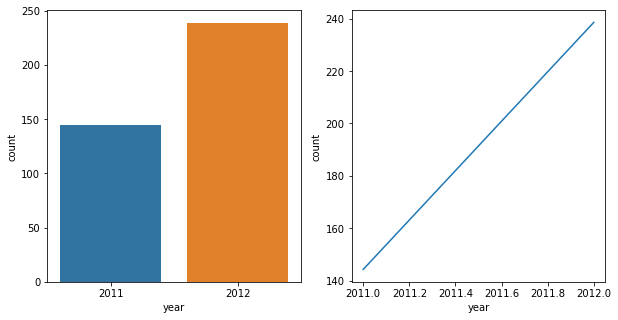

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='year',y='count',data=x)
plt.subplot(1,2,2)
sns.lineplot(x='year',y='count',data=x)
plt.show()

* From this we can say that passing year the count of users increasing
* In 2011 the count of users around 150 ,then it reaches 250 in 2012

[]

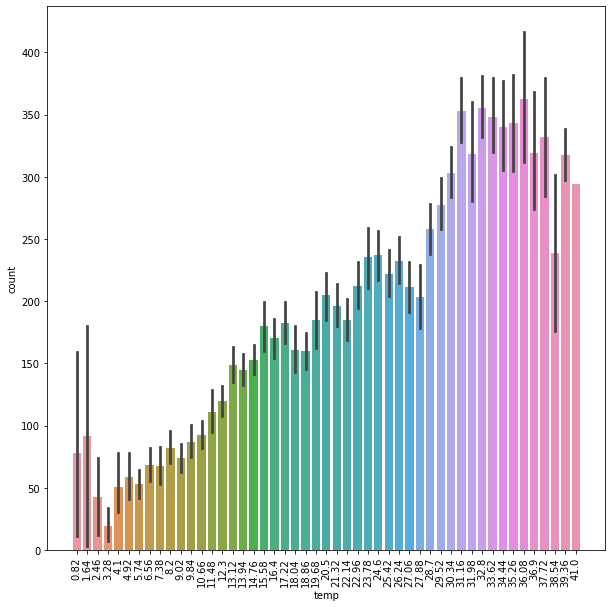

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x='temp',y='count',data=data)
plt.xticks(rotation=90)
plt.plot()

* From the above plot we can see that at lower temprature no.of users are very low
* most of the users are in the temp range of 25 to 40
* There is a gradual increse of no of users with increse in temprature

In [37]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday,January,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday,January,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday,January,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday,January,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,December,2012
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,December,2012
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,December,2012
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,December,2012


# Count of users in each humidity level

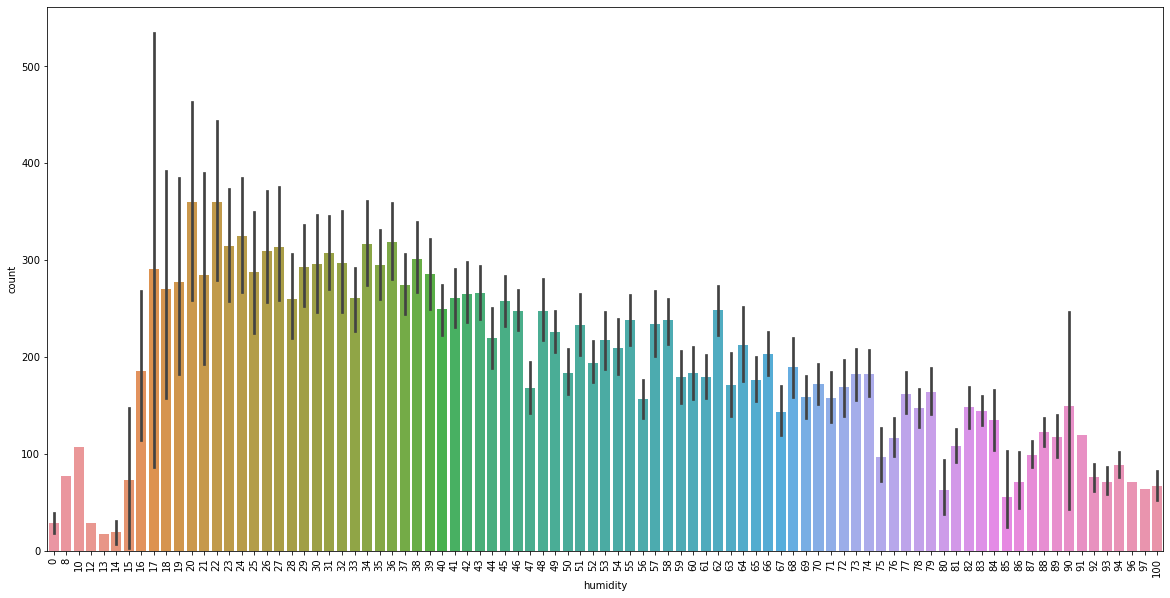

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x='humidity',y='count',data=data)
plt.xticks(rotation=90)
plt.show()


* More people use bikes when the humidity level is in between the range 20 - 23

## Multivariate

### Season : Count : Year

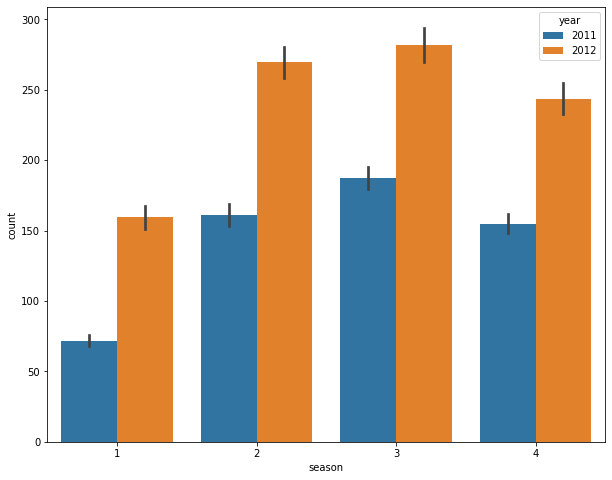

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='year',data=data)
plt.show()

### Season : casual : Year

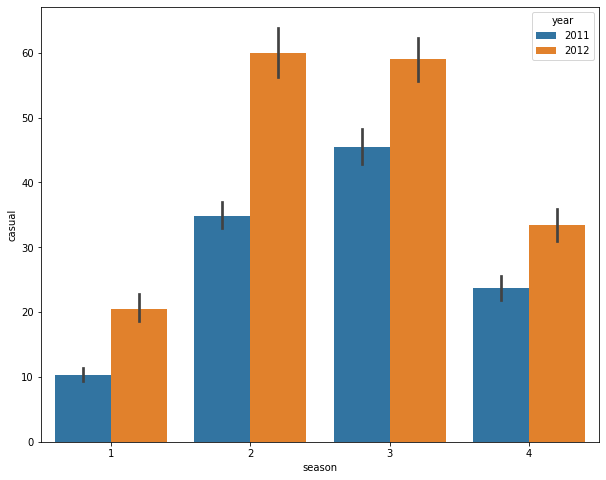

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='casual',hue='year',data=data)
plt.show()

### Season : registered : Year

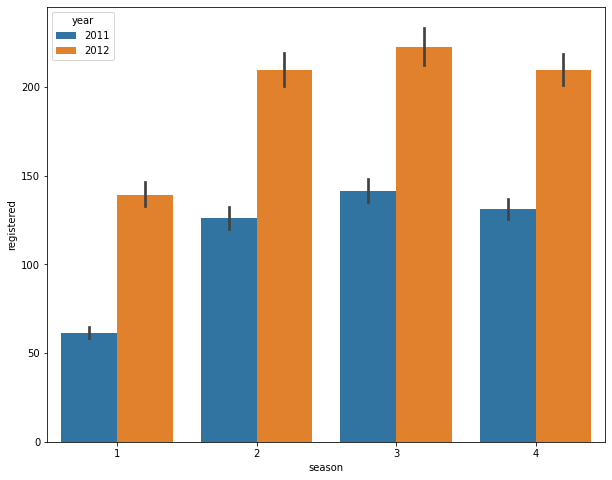

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='registered',hue='year',data=data)
plt.show()

* Compairing 2011 and 2012 the count of users more in 2012 
* Mostly used in season 3
* But in the case of casual user count in 2012 the count of users more in season 2 .
   * And also count of users in season 3 is around the same as season 2 in 2012
* In the case of registred user count in 2012 the count of users more in season 3 .
   * And least count of users in season 1

## Season : temp : month

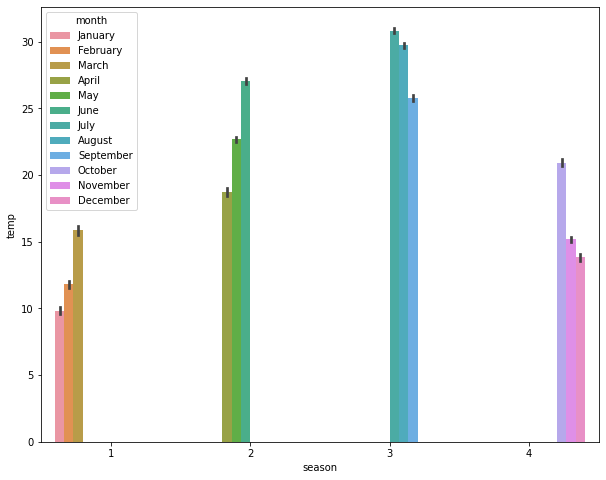

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='temp',hue='month',data=data)
plt.show()

* Season 3 is the highest temprature seasons
   * june
   * july
   * August
* season 1 is the lowest temprature seasons
    * january
    * february
    * March

## Season : count : month

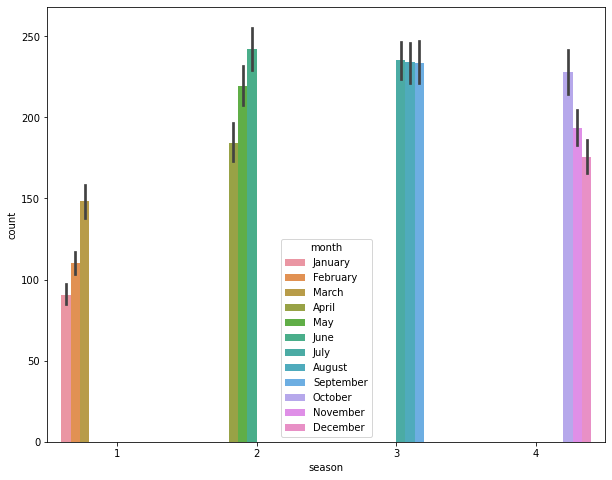

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='month',data=data)
plt.show()

* Season 2,3,4 is the highest bike user count seasons
* Season 1 is the lowest bike user count seasons consist of january february and March



## Season : windspeed : month

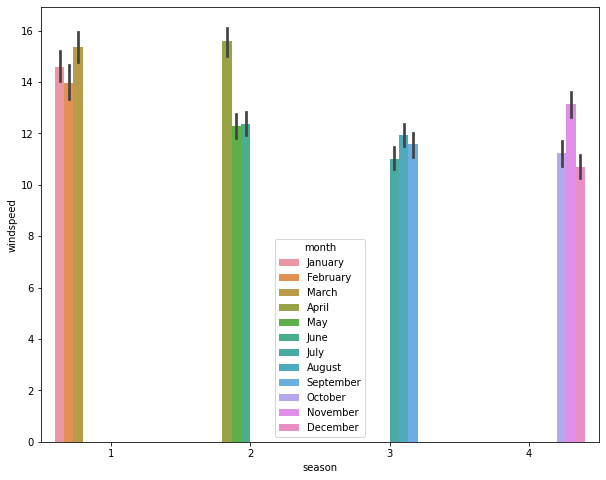

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='windspeed',hue='month',data=data)
plt.show()

* in season 1 and season 2 experienced high windspeed 
    * January
    * February
    * march
    * April
    * May
    * June
* Least windspeed experienced in july

## workingday : count : weather

[]

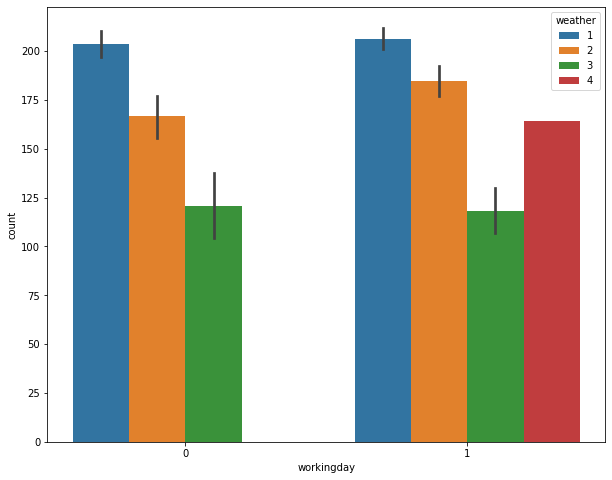

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(x='workingday',y='count',hue='weather',data=data)
plt.plot()

* In every weather conditions working days have most number of users
* In holidays in weater4 there is no user 

## Season : humidity : workingday

[]

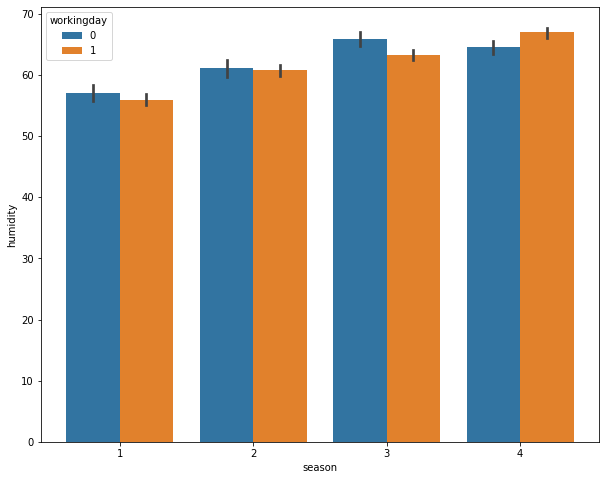

In [66]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='humidity',hue='workingday',data=data)
plt.plot()

* Experiencing Humidity in workingday and holiday is exactly equal in all season

## Season:Humidity: Month

[]

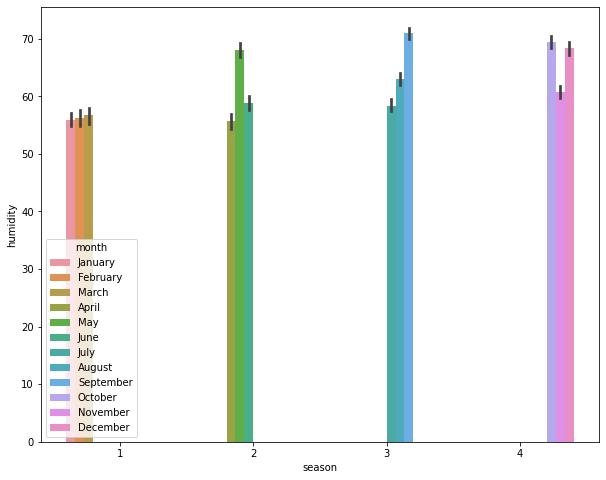

In [91]:
plt.figure(figsize=(10,8))
sns.barplot(data=data, x='season',y='humidity',hue='month')
plt.plot()

In [67]:
data.groupby('year')['count'].sum().sort_values(ascending=False).to_frame().reset_index()

,year,count
0,2012,1303497
1,2011,781979


In [68]:
g=data.groupby('year').agg({"registered":'sum',"casual":'sum'}).reset_index()
x=pd.melt(g, id_vars=['year'], value_vars=['registered', 'casual'])
x

,year,variable,value
0,2011,registered,626162
1,2012,registered,1067179
2,2011,casual,155817
3,2012,casual,236318


## Season : registered : Year

[]

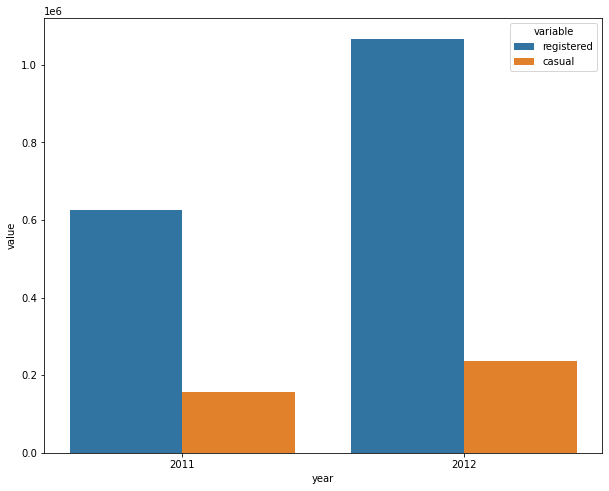

In [70]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='value',hue='variable',data=x)
plt.plot()

* compairing 2011 and 2012 we can say that the rate of registred users increasing
* Majority  of users are registred

In [71]:
g=data.groupby('month').agg({"registered":'sum',"casual":'sum'}).reset_index()
x=pd.melt(g, id_vars=['month'], value_vars=['registered', 'casual'])
x

,month,variable,value
0,April,registered,127589
1,August,registered,167646
2,December,registered,145460
3,February,registered,89816
4,January,registered,72632
5,July,registered,163670
6,June,registered,172159
7,March,registered,108445
8,May,registered,158862
9,November,registered,151087


[]

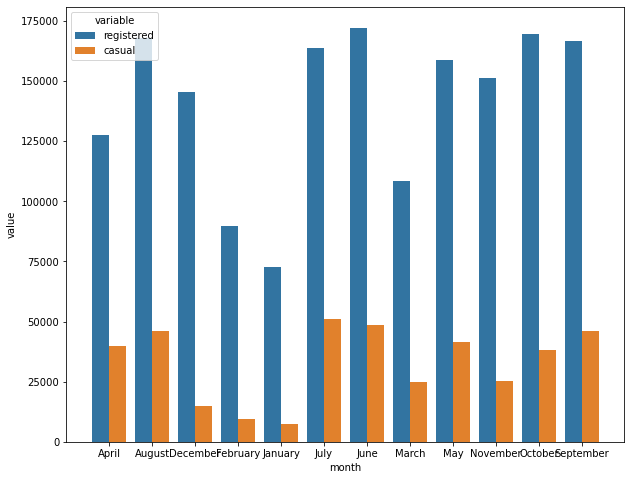

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(x='month',y='value',hue='variable',data=x)
plt.plot()

In [73]:
data['temp_bin']=pd.cut(data['temp'],bins=[-1,10,20,30,45],labels=['low_temp','medium_temp','normal_temp','high_temp'])
data['atemp_bin']=pd.cut(data['atemp'],bins=[-1,10,20,30,46],labels=['low_atemp','medium_atemp','normal_atemp','high_atemp'])
data['humidity_bin']=pd.cut(data['humidity'],bins=[-1,25,50,75,101],labels=['humidity<25%','humidity<50%','humidity<75%','humidity<100%'])
data['windspeed_bin']=pd.cut(data['windspeed'],bins=[-1,15,30,45,60],labels=['low_windspeed','medium_windspeed','high_windspeed','very_high_windspeed'])
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday,January,2011,low_temp,medium_atemp,humidity<100%,low_windspeed
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday,January,2011,low_temp,medium_atemp,humidity<100%,low_windspeed
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday,January,2011,low_temp,medium_atemp,humidity<100%,low_windspeed
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday,January,2011,low_temp,medium_atemp,humidity<75%,low_windspeed
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday,January,2011,low_temp,medium_atemp,humidity<75%,low_windspeed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,December,2012,medium_temp,medium_atemp,humidity<50%,medium_windspeed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,December,2012,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,December,2012,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,December,2012,medium_temp,medium_atemp,humidity<75%,low_windspeed


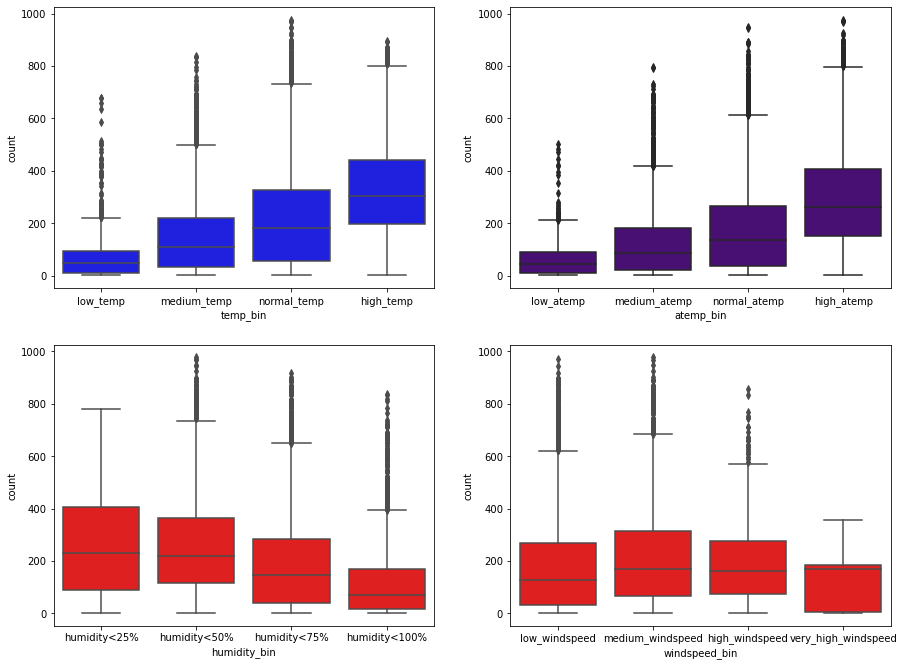

In [74]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=data, x="temp_bin",y='count',color="blue", ax=axis[0,0])
sns.boxplot(data=data, x="atemp_bin",y='count',color="indigo", ax=axis[0,1])
sns.boxplot(data=data, x="humidity_bin",y='count',color="red", ax=axis[1,0])
sns.boxplot(data=data, x="windspeed_bin",y='count',color="red", ax=axis[1,1])
plt.show()

* Users are comfortable in riding at high temperature
* People also prefer to ride humidity <25% so people use bikes when the humidity level is in between the range 20 - 23 
* More people comfortable to ride in  wind speed at medium level

# Weather is dependent on the season :Chisquare

* H0:Weather is Independent on season
* H1:Weather is dependent on season

In [ ]:

df = pd.crosstab(data.weather,data.season,margins=True,margins_name='Total')
df

In [ ]:
# Above weather 4 has less expected count so not include 4 
df=data[-(data['weather']==4)]
df

In [ ]:
df = pd.crosstab(df.weather,df.season,margins=True,margins_name='Total')
df

In [ ]:
stat,p_value,dof,expected =stats.chi2_contingency(df)
stat,p_value,dof,expected

In [ ]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Weather is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Weather is dependent on season ')

* We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, Weather is
dependent on season

# workingday is dependent on the season

* H0:workingday is Independent on season
* H1:workingday is dependent on season

In [75]:
df_count_season = pd.crosstab(data.workingday,data.season,margins=True,margins_name='Total')
df_count_season

season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [77]:
stat, p_value, dof, expected = stats.chi2_contingency(df_count_season)
stat, p_value, dof, expected

(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,   872.16994305,   872.16994305,   872.48906853,
          3474.        ],
        [ 1828.82895462,  1860.83005695,  1860.83005695,  1861.51093147,
          7412.        ],
        [ 2686.        ,  2733.        ,  2733.        ,  2734.        ,
         10886.        ]]))

In [78]:
alpha = 0.05
if p_value >= alpha:
    print('We Accept the Null Hypothesis : Workingday is Independent on season ')
else:
    print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season 


* We can see that p_value is greater than significant value(0.05) so we accept null hypothesis. So, Workingday is
Independent on season

# No. of cycles rented is similar or different in different season

* H0 : count of bikes  is similar across various season
* Ha : count of bikes is different across various season


In [ ]:

season_1 = data[data['season']==1]['count']
season_2 = data[data['season']==2]['count']
season_3 = data[data['season']==3]['count']
season_4 = data[data['season']==4]['count']

In [ ]:
p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
print("P-Value : ",p_value)

In [ ]:
alpha = 0.05
if p_value[1] >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various season ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various season ')

* We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes is
different across various season


# No. of cycles rented is similar or different in different weather

* H0 : count of bikes  is similar across various weather
* Ha : count of bikes is different across various weather

In [ ]:

weather_1 = data[data['weather']==1]['count']
weather_2 = data[data['weather']==2]['count']
weather_3 = data[data['weather']==3]['count']
weather_4 = data[data['weather']==4]['count']

In [ ]:
p_value = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print("P-Value : ",p_value)

In [ ]:
alpha = 0.05
if p_value[1] >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various weather ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various weather ')

* We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes is
different across various weather

# Recommendations And Insights :
* In weather:1 have more count of total rented bikes compaired to other weather
* Season 3 consist ofLight Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  but compaired to other season Season 3 have more number of users.
* Most of the users are using  in the windspeed range of 0 to 25  
* Season 2,3,4 is the highest bike user count seasons.Season 1 is the lowest bike user count seasons consist of january february and March
* Holidays of season 3 have more number of users.
* More users prefer the normal temperature 36.08. The lowest number users comes for bikes is in the
temperature 3.28
* More people use bikes when they feel 40.15 temperature.
* People also prefer to ride humidity <25% so people use bikes when the humidity level is in between the range 20 - 23 
* More people comfortable to ride in  wind speed greater than 50.
* compairing count of users in 2011 and 2012 there is huge increase in number of users in the year 2012.May be the registred people increase when it reach 2012 
* June,july and august month are the most bike using months.
* Most and least mean users are in respective days are friday and sunday
* Both registerd and casual users are increse with increse in year in everyseasons
* In every weather conditions working days have most number of users
